# COVID19 DATA ANALYSIS 
An Exploratory Data Analysis project to evaluate the effect of COVID19 outbreaks on several countries.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import geopandas as gpd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Import COVID19 CSV

In [26]:
covid = pd.read_csv('C:/Users/mtsha/Downloads/owid-covid-data.csv')

### Cleaning Data

In [27]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772,NaN,NaN,NaN,NaN


In [28]:
covid. columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [29]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [30]:
covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060828,112096.199420,122.357073,122.713852,835.514337,...,33.097758,50.649390,3.106895,73.702098,0.722178,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666404
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636565,162240.412405,1508.778585,559.701663,1134.932641,...,13.853952,31.905236,2.549168,7.387914,0.149237,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892770
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.190000,0.100000,53.280000,0.390000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.450000
25%,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100000,0.000000,0.000000,24.570000,...,22.600000,20.860000,1.300000,69.500000,0.600000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.875000
50%,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.480000,0.000000,2.790000,295.090000,...,33.100000,49.540000,2.500000,75.050000,0.740000,6.336393e+06,6.815200e+03,8.130000,5.660000,1270.800000
75%,7.582720e+05,0.000000e+00,3.132900e+02,9.574000e+03,0.000000,3.140000,156770.190000,0.000000,56.250000,1283.820000,...,41.500000,82.500000,4.210000,79.460000,0.830000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.025000
max,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,6601.110000,...,78.100000,100.000000,13.800000,86.750000,0.960000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.520000


In [31]:
covid.isnull().sum()

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [32]:
covid['date'] = pd.to_datetime(covid['date'])

In [33]:
countries = ['Poland', 'Norway', 'Finland', 'Germany', 'Vietnam']
covid_filtered = covid[covid['location'].isin(countries)]

In [34]:
covid_filtered = covid_filtered.dropna(subset=['total_cases','total_deaths', 'population', 'total_vaccinations', 'total_tests'])

In [35]:
num_cols = ['new_cases', 'new_deaths', 'people_vaccinated', 'total_vaccinations','total_cases','total_deaths', 'population', 'total_tests']
covid_filtered[num_cols] = covid_filtered[num_cols].fillna(0)

### Exploratory Data Analysis
        Visualized the total deaths, confirmed cases and vaccinations in 5 different countries, Poland, Norway, Vietnam, Finland and Norway, which have a similar population density. The total deaths, confirmed cases and vaccinations were all visualized over time also including the rate of deaths and vaccinations in the 5 selected countries.

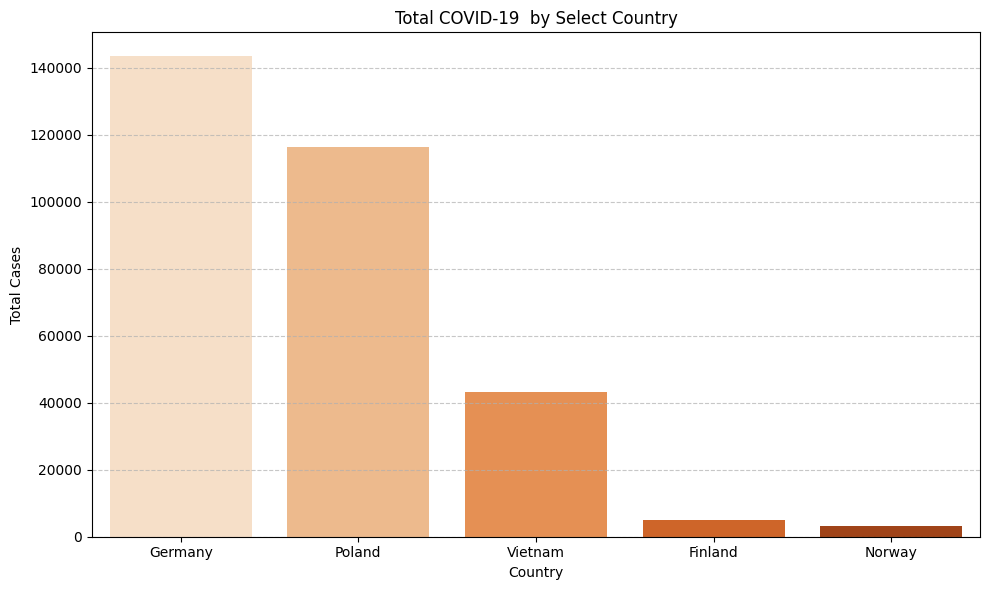

In [36]:
total_deaths = (covid_filtered.groupby('location', as_index=False)['total_deaths'].max().sort_values(by='total_deaths', ascending=False))

plt.figure(figsize=(10, 6))
sns.barplot(data=total_deaths, x='location', y='total_deaths', palette='Oranges', hue='location', dodge=False, legend=False)

plt.title('Total COVID-19  by Select Country')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

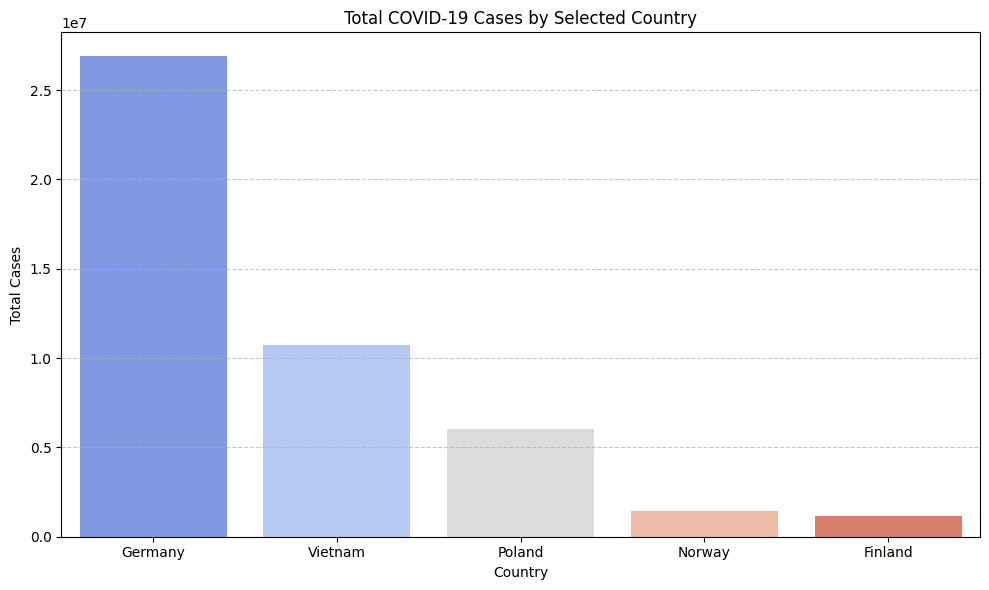

In [37]:
total_cases = (covid_filtered.groupby('location', as_index=False)['total_cases'].max().sort_values(by='total_cases', ascending=False))
plt.figure(figsize=(10, 6))
sns.barplot(data=total_cases, x='location', y='total_cases', palette='coolwarm', hue='location', dodge=False, legend=False)

# Add titles and labels
plt.title('Total COVID-19 Cases by Selected Country')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

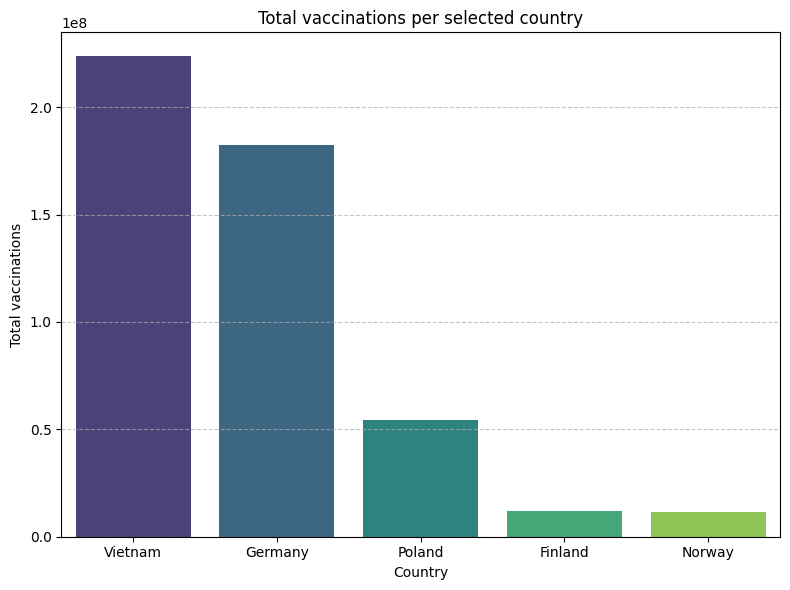

In [38]:
total_vacc = (covid_filtered.groupby('location', as_index=False)['total_vaccinations'].max().sort_values(by='total_vaccinations', ascending=False))
plt.figure(figsize=(8,6))
sns.barplot(data=total_vacc, x='location', y='total_vaccinations', hue='location', palette='viridis', dodge=False, legend=False)
plt.title('Total vaccinations per selected country')
plt.xlabel('Country')
plt.ylabel('Total vaccinations')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

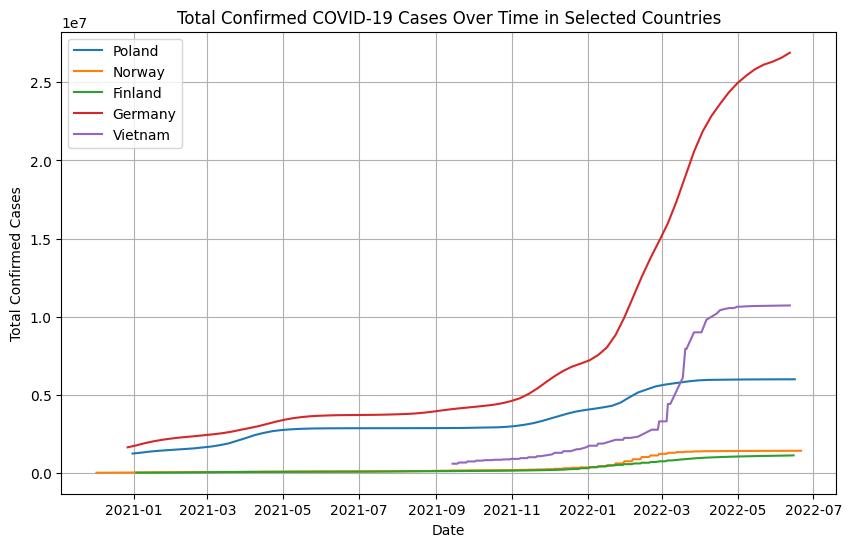

In [39]:
plt.figure(figsize=(10,6))
for country in countries:
    data = covid_filtered[covid_filtered['location'] == country]
    plt.plot(data['date'], data['total_cases'], label=country)
plt.title('Total Confirmed COVID-19 Cases Over Time in Selected Countries')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.legend()
plt.grid(True)
plt.show()


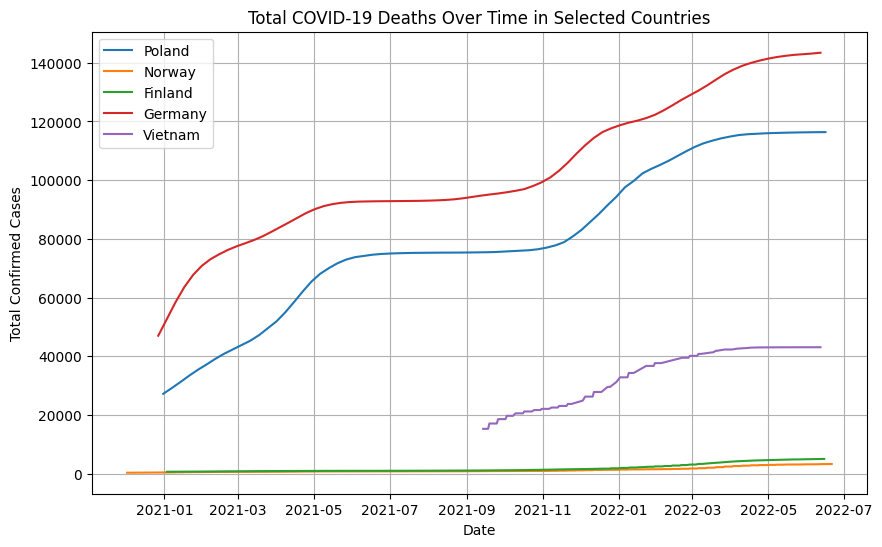

In [40]:
plt.figure(figsize=(10,6))
for country in countries:
    data = covid_filtered[covid_filtered['location'] == country]
    plt.plot(data['date'], data['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time in Selected Countries')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.legend()
plt.grid(True)
plt.show()


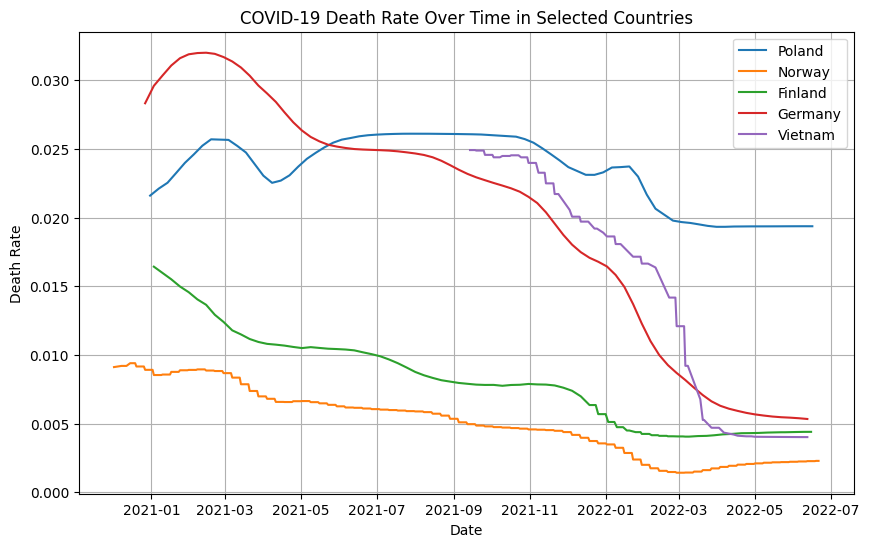

In [41]:
plt.figure(figsize=(10,6))
for country in countries:
    data = covid_filtered[covid_filtered['location'] == country].copy()
    data['death_rate'] = data['total_deaths'] / data['total_cases']
    plt.plot(data['date'], data['death_rate'], label=country)
plt.title('COVID-19 Death Rate Over Time in Selected Countries')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.grid(True)
plt.show()



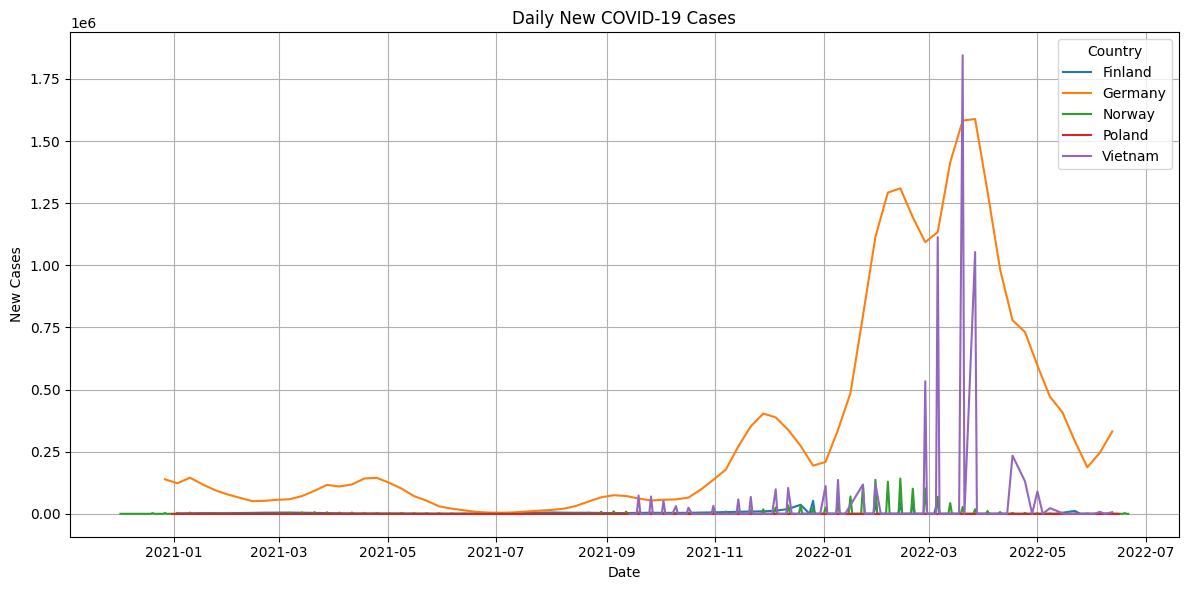

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=covid_filtered,x='date', y='new_cases', hue='location')

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

 Insights- Germany had the most cases and deaths compared to the others with Norway and Finland having the lowest cases and deaths. Interstingly Vietnam had more confirmed cases than Poland but Poland had more deaths compared to Vietman. This might have been because the number of people vaccinated in Vietnam bieng higher than all the selected countries which might have contributed to them having less deaths. Poland and Germany had the leading death rates in the initial outbreak but after, there seemed to be second outbreak (as seen from Daily New Cases) of COVID19 in Germany and Vietnam January 2022 (as seen in new cases) which led to more cases and deaths compared to the other 3 countries. Even though Poland did not seem to have a second outbreak it still had a higher death rate than Vietnam during the January 2022 time period,

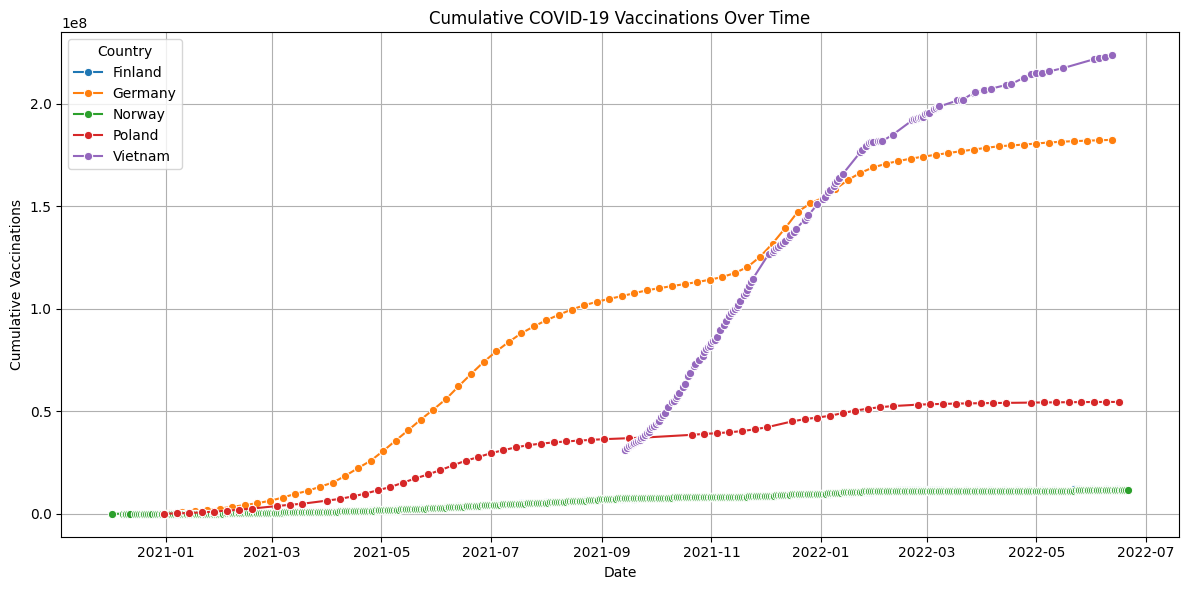

In [43]:
covid_filtered = covid_filtered.sort_values(by=['location', 'date'])

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=covid_filtered,
    x='date',
    y='total_vaccinations',
    hue='location',
    marker='o')

plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Vaccinations')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
latest_data = covid_filtered.sort_values('date').groupby('location').tail(1)
fig = make_subplots(rows=1, cols=len(countries), specs=[[{'type':'domain'}]*len(countries)],
                    subplot_titles=countries)

for i, country in enumerate(countries):
    row = latest_data[latest_data['location'] == country]
    
    if row.empty or pd.isna(row.iloc[0]['people_vaccinated']) or pd.isna(row.iloc[0]['population']):
        continue  

    vaccinated = row.iloc[0]['people_vaccinated']
    population = row.iloc[0]['population']
    unvaccinated = population - vaccinated
    
    fig.add_trace(
        go.Pie(
            labels=['Vaccinated', 'Unvaccinated'],
            values=[vaccinated, unvaccinated],
            name=country,
            marker=dict(colors=['#003f5c', '#FFFDD0']),
            textinfo='label+percent'
        ),
        row=1, col=i+1
    )

fig.update_layout(
    title_text="COVID-19 Vaccination Status by Country",
    showlegend=False,
    height=400,
    width=1200
)

fig.show()


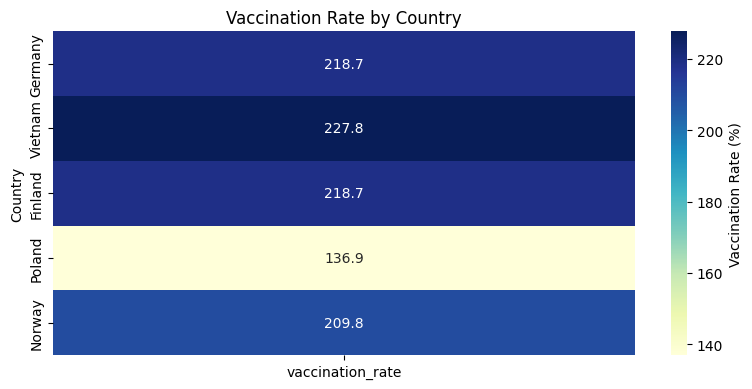

In [45]:
latest_data['vaccination_rate'] = (latest_data['total_vaccinations'] / latest_data['population']) * 100

heatmap_data = latest_data.set_index('location')[['vaccination_rate']]

plt.figure(figsize=(8, 4))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap='YlGnBu',
    cbar_kws={'label': 'Vaccination Rate (%)'}
)

plt.title('Vaccination Rate by Country')
plt.ylabel('Country')
plt.xlabel('')
plt.tight_layout()
plt.show()

Insights- Vietnam had more people vaccinating compared to the other countries which interstingly started their vaccinations earlier than Vietnam. The percentage of people vaccinated across the 5 countries except for Poland which had the lowest vaccination rates which might have contributed to the higher number of deaths esxperience that country.

In [46]:
covid = covid[covid['iso_code'].str.len() == 3]
country_avg_deaths = covid.groupby('location', as_index=False)['total_deaths'].mean()
iso_lookup = covid.groupby('location', as_index=False)['iso_code'].first()
country_avg_deaths = country_avg_deaths.merge(iso_lookup, on='location')

fig = px.choropleth(
    country_avg_deaths,
    locations='iso_code',
    color='total_deaths',
    hover_name='location',
    color_continuous_scale='Reds',
    title='Average COVID-19 Deaths by Country in the World'
)

fig.show()


How the world was affected by COVID 19- The African continent seemed to have the least deaths compared to the others,the Americas were heavily affected. Countries that stand out are Russia, India, America, Alaska, Mexico and Brazil. These were the top countries that gad the most number opf deaths in these countries.